# Finding Earning Opportunities - Analysing Patterns to Win Jeopardy 

# Introduction 

The purpose of this project is to look for a way to win Jeopardy. Jeopardy is a popular TV show based in the US where players answer questions to win money. We'll be working with a Jeopardy dataset to discover useful patterns in the questions that can help us win. More specifically, we'll try to answer the following questions:

- "How often can an answer be used for a question?"
- "How often are questions repeated?"
- "Are high-value questions more useful than low-value questions?"

Overall, we found only one potentiall statistically significant relationship among the variables we have investigated. Here are the answers that we found to our questions:

- Only 5.7% of questions have their answers in the questions asked, which means that we cannot win trying to discover the answers of questions using the question itself.
- Questions are repeated 87% of the time. Although we're only looking at a small set of questions, this finding means that it might be worth investigating repeated questions further.
- No statistically significant difference was found between high value and low value rows. Moreover, the frequencies are all lower than 5, so the chi-squared test is not as valid. 

Eventually, we came to the conclusion that further analysis is needed to find more relevant correlations. 

# Reading in the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
from scipy.stats import chisquare 

In [2]:
jeopardy = pd.read_csv('~/Desktop/my_projects/data/JEOPARDY_CSV.csv')

In [3]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
jeopardy.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [5]:
# Removing unnecessary white spaces
jeopardy.columns = jeopardy.columns.str.strip()

In [6]:
jeopardy.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [7]:
jeopardy.dtypes

Show Number     int64
Air Date       object
Round          object
Category       object
Value          object
Question       object
Answer         object
dtype: object

# Normalizing Text

In [8]:
# Defining a function that normalizes text
def normalize_text(text):
    text = str(text).lower() # converting the string to lowercase
    normalized_text = re.sub("[^\w\s]", "", text) # removing all punctuation with a regex that excludes word and space characters 
    return normalized_text

# Applying the function to the Question and Answer columns
jeopardy['clean_question'] = jeopardy['Question'].apply(normalize_text)
jeopardy['clean_answer'] = jeopardy['Answer'].apply(normalize_text)

jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams


# Normalizing Columns

In [9]:
# Writing a function that normalizes columns
def normalize_column(string):
    normalized_string = re.sub("[^\w\s]", "", string) # removing any punctuation in the string 
    try: 
        int_string = int(normalized_string) # converting the string into an integer 
    except Exception:
        int_string = 0 # assigning 0 if the conversion has an error 
    return int_string

# Applying the function to the Value column
jeopardy['clean_value'] = jeopardy['Value'].apply(normalize_column)

# Converting the Air Date column from a string to a datetime column 
jeopardy['Air Date'] = pd.to_datetime(jeopardy['Air Date'])

jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200


# Answers in Questions

In order to understand what we should study to win Jeopardy, it'd be useful to find out how often the answer can be used for a question. This will help us answer our first question: "How often can an answer be used for a question?". We can discover this by looking at how many times words in the answer also occur in the question. 

In [10]:
# Writing a function that counts the number of word matches between questions and answers
def match_count(row):
    split_answer = row['clean_answer'].split() # Turning each answer into a list of words 
    split_question = row['clean_question'].split() # Turning each question into a list of words
    match_count = 0
    if "the" in split_answer:
        split_answer.remove("the") # Removing 'the' since it doesn't have any meaningful use in finding the answer
    if len(split_answer) == 0:
        return 0
    for item in split_answer:
        if item in split_question:
            match_count += 1
    return match_count / len(split_answer) # Finding the number of times we can use a word relative to the overall list of words in split_answer

# Applying the function to the clean_question and clean_answer columns 
jeopardy['answer_in_question'] = jeopardy.apply(match_count, axis=1)

# Finding the mean of the answer_in_question column
jeopardy['answer_in_question'].mean()

0.05792070323661354

On average, only 5.7% of questions have their answers in the questions asked. This does not seem to be a high enough result and it might mean that we cannot win trying to discover the answers of questions using the question itself. Let's plot these results on a histogram to explore them further and make sure that there's no value interesting enough for us.

In [11]:
# Creating a histogram for the answer_in_question column
histogram = jeopardy['answer_in_question'].value_counts(normalize=True, bins = 5)*100
histogram.sort_index(inplace=True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-20%'),
  Text(1, 0, '20-40%'),
  Text(2, 0, '40-60%'),
  Text(3, 0, '60-80%'),
  Text(4, 0, '80-100%')])

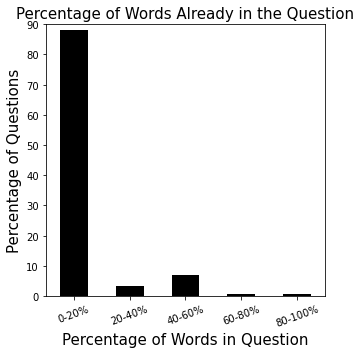

In [12]:
# Plotting the histogram
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)

# Setting limits and ticks
ax.set_xticks ([0, 1.0, 2.0, 3.0, 4.0, 5.0])
ax.set_xlim(0,5)
ax.set_ylim(0,90)

# Writing a title
ax.set_title('Percentage of Words Already in the Question', size= 15)

# Plotting the histogram
histogram.plot.bar(color='black')

# Setting axes labels
ax.set_xlabel('Percentage of Words in Question', fontsize = 15)
ax.set_ylabel('Percentage of Questions', fontsize = 15)

# Adding more accurate xticks labels
ax.set_xticklabels(['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

# Rotating xticks labels for readability
plt.xticks(rotation=20)

As shown by the bar plot above, the majority of answers do not have words which appear in their questions. This might mean that we cannot find any value of interest in the answers to win jeopardy. So it might be more efficient for us to study for the game.

# Recycled Questions

Let's try to answer the second question: "How often are questions repeated?". This might be a helpful information for us to win the game. We might not be able to completely answer this question, since we only have about 10% of the full Jeopardy question dataset. However, we can at least investigate it.

In [13]:
# Checking if the terms in questions have been used previously or not
question_overlap = [] # Keeping an initially empty list for the overlap of questions 
terms_used = set() # Maintaining an initially empty set for the terms used 
jeopardy = jeopardy.sort_values(by=['Air Date']) # Sorting the dataset in order of ascending air date

for i, row in jeopardy.iterrows(): # Using iterrows() to loop through each row of jeopardy
    split_question = row['clean_question'].split(" ") # Splitting each word around whitespaces 
    split_question = [q for q in split_question if len(q) > 5] # Filtering out words like 'the' and 'than' with lambda function
    match_count = 0 
    for word in split_question: # Looping through each word in split_question
        if word in terms_used:
            match_count += 1 # Incrementing match_count if the term occurs in term_used 
    for word in split_question:
        terms_used.add(word) # Using the add() method to add each word of split_question to term_used
    if len(split_question) > 0:
        match_count /= len(split_question)
    question_overlap.append(match_count) # Appending the final count of matches to the question_overlap list 
        
jeopardy['question_overlap'] = question_overlap
jeopardy['question_overlap'].mean()

0.8721766377741468

On average, there is an 87% overlap between words used in new questions and words used in old questions. This is a pretty high percentage, which proves that it might be wortwhile to study past questions to win jeopardy. We will now plot another histogram to check how the percentages are partitioned.

In [14]:
histogram_2 = jeopardy['question_overlap'].value_counts(normalize = True
                                          ,bins = 10)*100

histogram_2.sort_index(inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-10%'),
  Text(1, 0, '10-20%'),
  Text(2, 0, '20-30%'),
  Text(3, 0, '30-40%'),
  Text(4, 0, '40-50%'),
  Text(5, 0, '50-60%'),
  Text(6, 0, '60-70%'),
  Text(7, 0, '70-80%'),
  Text(8, 0, '80-90%'),
  Text(9, 0, '90-100%')])

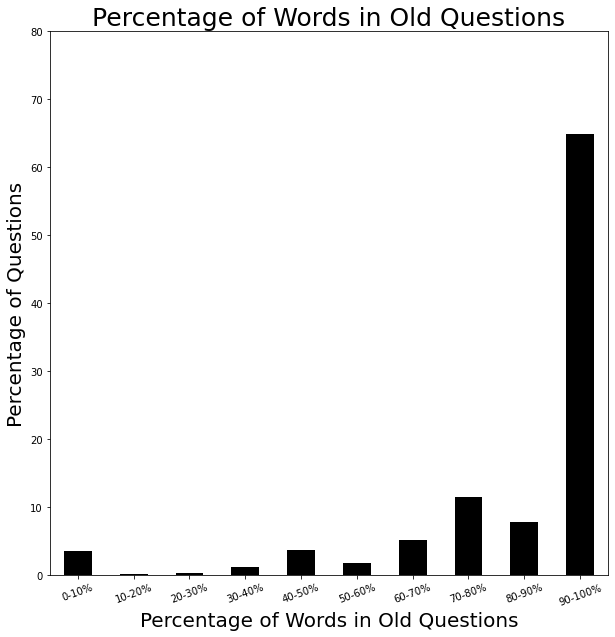

In [15]:
# Creating figure and plot
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1,1,1)

# Setting limits and ticks
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax.set_xlim(0,5)
ax.set_ylim(0,80)

# Writing a title 
ax.set_title('Percentage of Words in Old Questions', size = 25)

# Plotting the bar chart 
histogram_2.plot.bar(color = 'black')

#Adding axes labels
ax.set_xlabel('Percentage of Words in Old Questions',fontsize = 20)
ax.set_ylabel('Percentage of Questions', fontsize = 20)

#Adding xticks labels
ax.set_xticklabels(['0-10%','10-20%','20-30%','30-40%','40-50%'
                    ,'50-60%','60-70%','70-80%','80-90%','90-100%'])

#Rotating the xticks labels for readability
plt.xticks(rotation = 20)

It looks like 90% of the words in old questions appear in 60% of the questions. This shows that it might be wortwhile to study from past questions to win jeopardy. However, here, we're only looking at a small set of questions, and we're specifically looking at single terms rather than whole phrases. So our findings could turn out to be relatively insignificant. It would be good to investigate on the repeated questions further in another project. For now, let's try to answer the third and last question for the purpose of this project.

# Low Value vs High Value Questions

Let's try to answer our last question: "Are high-value questions more useful than low-value questions?". By only studying high-value questions, we might be able to optimise our effort and earn more money when playing Jeopardy. We can find the words with the biggest differences in usage between high and low value questions by selecting the words with the highest associated chi-squared values. However, doing this for all of the words would be extremely time consuming. Hence why we will perform this analysis only on a small sample for now.

In [16]:
# Narrowing down the questions into two categories
def determine_value(row):
    if row['clean_value'] > 800:
        return 1
    else:
        return 0

# Adding a high_value column to determine which questions are high and low value
jeopardy['high_value'] = jeopardy.apply(determine_value, axis=1)

In [17]:
# Finding the number of low_value and high_value questions each word occur in 
def value_count(word):
    low_count = 0
    high_count = 0 
    for i, row in jeopardy.iterrows(): # Iterating through each row in the dataset 
        if word in row['clean_question'].split(" "): # Splitting each word around whitespaces to create a python list  
            if row['high_value'] == 1: # Checking if the word is in a question that has a high value 
                high_count += 1 # Incrementing high_count if the word appear in a high-value question
            else:
                low_count += 1
    return high_count, low_count # Returning the final count of low and high-value words 

In [18]:
# Applying value_count function on a random selection of words 
from random import choice 
comparison_terms = [choice(list(terms_used)) for i in range(10)] # Randomly picking ten elements from terms_used
comparison_terms

['floras',
 'danton',
 'sortie',
 'santarem',
 'kordofanian',
 'falalas',
 'samanthaa',
 'nonmailable',
 'prevacid',
 'mclaughlin']

In [19]:
observed_expected = [] # Initiating an empty list 

for word in comparison_terms:
    v = value_count(word) 
    observed_expected.append(v) # Running function on the term to get high and low value counts 

In [20]:
observed_expected

[(1, 0),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 3)]

# Applying the Chi-squared Test

Now that we've computed the observed counts for a few terms, we can compute the expected counts and the chi-squared value.

In [21]:
# Computing the expected counts, the chi-squared value, and the p-value
high_value_count = jeopardy[jeopardy['high_value'] == 1].shape[0]
low_value_count = jeopardy[jeopardy['high_value'] == 0].shape[0]
chisquared = []

for obs in observed_expected:
    total = sum(obs) # Adding up both items in the list (high and low counts) to get the total count 
    total_prop = total / jeopardy.shape[0] # Calculating the proportion of the total count across the dataset 
    high_value_exp = total_prop * high_value_count # Computing the expected term count for high value rows
    low_value_exp = total_prop * low_value_count # Computing the expected term count for low value rows
    
    observed = np.array([obs[0], obs[1]]) 
    expected = np.array([high_value_exp, low_value_exp])
    chisquared.append(chisquare(observed, expected)) # Computing the chi-squared value and p-value given the expected and observed counts
    
chisquared

[Power_divergenceResult(statistic=2.5317964247338085, pvalue=0.11157312838169751),
 Power_divergenceResult(statistic=0.03723409388907139, pvalue=0.846989214486915),
 Power_divergenceResult(statistic=2.5317964247338085, pvalue=0.11157312838169751),
 Power_divergenceResult(statistic=2.5317964247338085, pvalue=0.11157312838169751),
 Power_divergenceResult(statistic=0.3949764642333513, pvalue=0.5296950912486695),
 Power_divergenceResult(statistic=0.3949764642333513, pvalue=0.5296950912486695),
 Power_divergenceResult(statistic=2.5317964247338085, pvalue=0.11157312838169751),
 Power_divergenceResult(statistic=0.3949764642333513, pvalue=0.5296950912486695),
 Power_divergenceResult(statistic=2.5317964247338085, pvalue=0.11157312838169751),
 Power_divergenceResult(statistic=0.021646150708492677, pvalue=0.8830323245068887)]

As observed above, no statistically significant difference was found between high value and low value rows. Moreover, the frequencies are all lower than `5`, so the chi-squared test is not as valid. It might be better to run this test only with terms that have higher frequencies.

# Conclusion

In this project, we looked for a way to win Jeopardy by analysing a Jeopardy dataset. We've tried to discover useful patterns by answering to the following questions:

- "How often can an answer be used for a question?"
- "How often are questions repeated?"
- "Are high-value questions more useful to win than low-value questions?"

Overall, we found only one potentially statistically significant relationship among the variables we have investigated. Here are the answers that we found to the abovementioned questions:

- Only 5.7% of questions have their answers in the questions asked, which means that we cannot win trying to discover the answers of questions using the question itself.
- Questions are repeated 87% of the time. Although we're only looking at a small set of questions, this finding means that it might be worth investigating repeated questions further.
- No statistically significant difference was found between high value and low value rows. Moreover, the frequencies are all lower than 5, so the chi-squared test is not as valid. 

Thus, further analysis is needed to find more relevant correlations. For example, we could find a better way to eliminate non-informative words than just removing words that are less than `6` characters long. This strategy could be achieved by manually creating a list of words to remove (g.e., `the`, `than`, etc.), or remove words that occur in more than a certain percentage (g.e., `5%`) of questions. Moreover, our findings show that exploring the repeated questions more might also be a good option to effectively win jeopardy. 

In [22]:
# Creating a vocabulary for the questions in the dataset

jeopardy['Question'] = jeopardy['Question'].str.split() # Transforming each question into a list

vocabulary = [] # Initiating an empty list 
for value in jeopardy['Question']: # Using a nested loop to iterate each question in the question column 
    for i in value:
        vocabulary.append(i) # Appending each string (word) to the vocabulary list 
vocabulary = set(vocabulary) # Removing duplicates from vocabulary list using the set() method 
vocabulary = list(vocabulary) # Transforming the set back into a list 

In [ ]:
# Creating a dictionary for our dataset

word_counts_per_question = {unique_word: [0] * len(jeopardy['Question']) for unique_word in vocabulary} # outputting a list of the length of `jeopardy['Question']`, where each element in the list will be a `0`

for index, question in enumerate(jeopardy['Question']): # using the enumerate() function to get both the index and the question text 
    for word in question: # looping over `question` (a list of strings, where each string represents a word in a question)
        word_counts_per_question[question][index] += 1 # incrementing the dictionary by 1 

In [ ]:
# Transforming word_counts_per_question into a DataFrame
word_counts = pd.DataFrame(word_counts_per_question)
word_counts.head()